In [1]:
import numpy as np
import matplotlib.pyplot as plt

## basics

- 也叫 posterior sampling：后验采样；
    - randomized bayesian algorithm；

## Thompson sampling

- reward of an arm $(X)$ follows a bernoulli distribution (有奖励，没奖励)

    $$
    X\sim Bern(\theta)
    $$
    
    - 以概率 $\theta$ 能拿到奖励，$1-\theta$ 没有奖励

- the reward/number of successes $(Y)$ follows a binomial distribution

    $$
    Y\sim Binomial(n,\theta)
    $$
    
    - $y$ 表示赢的次数，$n-y$ 显示表示输的次数；
    
- $\theta\sim Beta(\alpha, \beta)$, the probability of winning for each arm，现在的目标是计算

    $$
    p(\theta|y)
    $$
    
    - 一个后验分布
    

$$
\begin{split}
p(\theta|y)&\propto P(y|\theta) P(\theta)\\
&=\binom{n}{y}\theta^y(1-\theta)^{n-y}\frac1{B(\alpha,\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}\\
&\propto \theta^{y+\alpha-1}(1-\theta)^{n-y+\beta-1}\\
&\propto Beta(y+\alpha, n-y+\beta)
\end{split}
$$

- $y$: # of winning
- $n-y$: # of losing
- 共轭分布：先验（prior）与后验（posterior）为相同类型的分布时；

## beta distribution

- 这里稍微补充一下 beta 分布，$\theta\sim Beta(\alpha, \beta)$
    
$$
f(\theta;\alpha,\beta)=\frac{1}{B(\alpha,\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

- 其中 beta 函数

$$
\begin{split}
B(\alpha,\beta)&=\int_0^1t^{\alpha-1}(1-t)^{\beta-1}dt\\
&=\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}
\end{split}
$$

- $Beta(1,1)\rightarrow f(\theta|1,1)=1$ 退化为 `[0, 1]` 之间的均匀分布
- $Beta(2,1)\rightarrow f(\theta|2,1)=2\theta$
- $Beta(1,2)\rightarrow f(\theta|1,2)=2(1-\theta)$

## examples

- arm 1：$\theta=0.6$
- arm 2: $\theta=0.2$
- timestamp 1
    - beta(0+1, 0+1)：0-1均匀分布
    - beta(0+1, 0+1)：0-1均匀分布
    - sample: 0.7 > 0.4
    - choose arm1
    - 得到reward => arm1, beta(2, 1)（否则是 arm1，beta(1, 2)）
- timestamp2
    - beta(2, 1) vs. beta(1, 1)
    - sample: 0.6 < 0.9
    - choose arm2 
    - 没有得到 reward => arm2，beta(1, 2)（否则 arm2，beta(2, 1)）
- timestamp3
    - beta(2, 1) vs. beta(1, 2)
    - sample: 0.8 > 0.3
    - choose arm1
    - 没有得到reward => arm1, beta(2, 2) （否则 arm1，beta(3, 1))
- ...

In [22]:
# True payout % (probabilities of success) of each arm
actual_prob = [0.1, 0.7, 0.5]  # hidden variables in reality

# Counts of success and failure of each arm
succ_fail = [[0,0], [0,0], [0,0]]  # each sub-list contains [num of success, num of failure]

for trial in range(101):
    # Sample a data point (thompson sampling) from all arms' Beta distrib
    samples = [np.random.beta(s+1, f+1) for s, f in succ_fail]  # add 1 because can't pass 0
    
    # Pick the arm with highest sampled estimate
    best_arm = np.argmax(samples)
    
    # Play with best arm
    # since each arm is modelled as bernoulli variable, to sample from bernoulli distribution is same as 
    # sampling a uniform distrib variable & comparing with p (payout), if its less than p, then Success else Failure
    if np.random.uniform() < actual_prob[best_arm]:  
        # if we win with this arm
        succ_fail[best_arm][0] += 1 
    else:
        # if we lose with this arm
        succ_fail[best_arm][1] += 1

    # logging
    if trial % 10 == 0: 
        print(f"trial: {trial}\tsucc_fail: {succ_fail}")

trial: 0	succ_fail: [[0, 0], [1, 0], [0, 0]]
trial: 10	succ_fail: [[0, 1], [5, 3], [0, 2]]
trial: 20	succ_fail: [[0, 1], [12, 4], [2, 2]]
trial: 30	succ_fail: [[0, 1], [16, 8], [4, 2]]
trial: 40	succ_fail: [[0, 3], [18, 10], [6, 4]]
trial: 50	succ_fail: [[0, 3], [23, 11], [8, 6]]
trial: 60	succ_fail: [[0, 3], [28, 15], [8, 7]]
trial: 70	succ_fail: [[0, 3], [33, 16], [11, 8]]
trial: 80	succ_fail: [[0, 3], [40, 17], [11, 10]]
trial: 90	succ_fail: [[0, 3], [46, 20], [12, 10]]
trial: 100	succ_fail: [[0, 3], [54, 21], [12, 11]]


In [20]:
from scipy.stats import beta

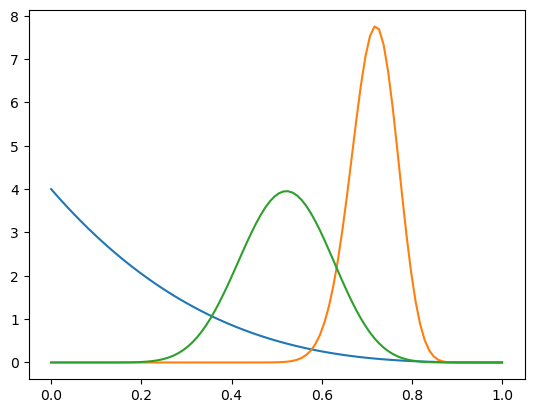

In [23]:
xs = np.linspace(0, 1, 100)
plt.plot(xs, beta.pdf(xs, succ_fail[0][0]+1, succ_fail[0][1]+1))
plt.plot(xs, beta.pdf(xs, succ_fail[1][0]+1, succ_fail[1][1]+1))
plt.plot(xs, beta.pdf(xs, succ_fail[2][0]+1, succ_fail[2][1]+1))